# Assignment 1:  Numpy, Pandas, Matplotlib and Data Wrangling

This task contains 3 main questions with details as below. The due date is October 22 (Tuesday), 2024, at 11:59 pm. Each day late will result in a loss of 20% of your total points. Please upload a `.ipynb` file with your solved notebook on Moodle.

Good job! To enjoy!

### Question 1 (5,0 values) Spike Triggered Average

Welcome to the world of neuroscience! <br>
In this exercise you will have the opportunity to be gently introduced to the magnificent world of how your brain  executes what you think! 

<img src="brain.jpg" alt="brain" width="50%">

The brain is perhaps our most complex vital living organ, meaning that the multitude of years of research so far is still not sufficient to understand how such an organ behaves.
 <br>

Biologically, the brain is formed by a particular form of cells that are called <strong>neurons</strong>. Such neurons are electrically excitable cells that communicate with one another via specialized connections named <strong>synapses</strong>. These connections allow the transmission of chemical and electrical signals across neurons. In very high-level terms, such a process gives birth to the human thought, giving us the possibility to carry out our ordinary life tasks and habits, such as talking with friends, eating, drinking, studying, and so on and so forth.
Moreover, it is possible to say that communication across two neurons is experienced when we observe a <strong>spike</strong>, which is solicited by an electrical <strong>stimulus</strong> (through time). <br> 
As an example, imagine you are on your sofa watching your favorite movie: each photogram of the video you see from your eyes will be converted into a sequence of electrical signals, which we previously defined as <strong>stimulus</strong> (this is the scientific term). Then the stimulus flows in the network of your neurons, potentially activating their effects on your behavior. Specifically, if you watch a love scene, some neurons of the brain may <strong>spike</strong> (actually they are activated), potentially making you feel pleased and emotional. On the contrary, if you watch a violent scene, some other neurons may spike, potentially making you feel sad and uncomfortable. This is an abstract example talking about emotions, but bear in mind that examples of this kind are extendable to more practical activities such as the ones mentioned in the paragraph above. 

Practically speaking, in this exercise, you will analyze a stimulus and consequantly how it affects the spikes of a single neuron. <strong>Data is randomly generated</strong>, but it simulates perfectly the setting depicted above. In the end, you will compute the <strong>Spike-Triggered Average</strong> (STA), which, given a fixed time window, approximates the stimulus's behavior before a spike occurs. This is a time-wise average, meaning that, given many <strong>fixed-in-length time-sequences</strong> (same milliseconds long in this case) of the same stimulus, we average the sequences at their values at each millisecond step. 

Some clarifications: 

You will be provided with two time-series, one with the stimulus and the other one with the spikes. The latter series maps to the former, of course.
Stimulus varies in time, specifically milliseconds (ms), meaning that each element in the stimulus is an electrical signal at a single millisecond. Whereas, the spikes are in binary form: 1 if a spike occurred, 0 if a spike did not occur at that specific milliseconds. 

In [1]:
# Import Dependencies 

import numpy as np # DON'T CHANGE THIS LINE 
import pickle # DON'T CHANGE THIS LINE 

In [2]:
# Load Data 

path = "data.pickle" # Make sure the dataset "data.pickle" is within the same folder of this notebook
data = pickle.load(open(path, 'rb')) # DON'T CHANGE THIS LINE


In [3]:
# Reference Data 

# DON'T CHANGE THESE 2 LINES 
stimulus = data['stim'] # Stimulus (in STA units) over time (in milliseconds units) - Artificial Data - type: numpy.ndarray
rho = data['rho'] # Spikes - 0 or 1. 0 no spike, 1 yes spike - Mapping stimulus - type: numpy.ndarray

#### Question 1.1

How many milliseconds does the `stimulus` provided above have? 

In [4]:
# Question 1.1

print(f"The stimulus has {len(stimulus)}")

The stimulus has 600000


#### Question 1.2

Filter out the low stimulus values. 
Set a minimum threshold of 10 STA units for the <strong> absolute value </strong> of the stimulus and filter out everything below it (do not change the original stimulus array).

For example: 
<br>Consider stimulus = [-5.2345, 3.4564, 13.1245, -15.2356]<br>
The final result should be: filtered_stimulus = [13.1245, -15.2356]

Tip: Use 
<strong> print(filtered_stimulus[0:100]) </strong>
to check if the first 100 values are beeing filtered correctly.

In [5]:
# Question 1.2
print(stimulus[0:30])
  
#filtered_stimulus= list(filter(lambda stim: stim >=10 or stim<=-10,stimulus))
filtered_stimulus = stimulus[np.abs(stimulus)>=10]

print(filtered_stimulus[0:30])



[-111.94824219  -81.80664062   10.21972656   83.36425781   69.375
    2.66113281  -25.91796875  -32.24609375  -27.29492188  -20.24414062
  -32.21679688   -8.61816406   35.06347656   55.92285156   46.72851562
   53.75976562   96.84082031  121.67480469  109.58984375   71.92871094
   16.76757812   17.95898438   63.7890625    90.24902344  103.49121094
   76.31347656   35.65429688   58.61816406   68.05175781   44.30664062]
[-111.94824219  -81.80664062   10.21972656   83.36425781   69.375
  -25.91796875  -32.24609375  -27.29492188  -20.24414062  -32.21679688
   35.06347656   55.92285156   46.72851562   53.75976562   96.84082031
  121.67480469  109.58984375   71.92871094   16.76757812   17.95898438
   63.7890625    90.24902344  103.49121094   76.31347656   35.65429688
   58.61816406   68.05175781   44.30664062   38.52539062  -24.78027344]


#### Question 1.3

Compute the interquartile range of the values of the `stimulus` time series.

  ℹ️<strong>interquartile_range = q75 - q25</strong>
    <br> Where: q25 is the first quartile and q75 is the third quartile.

In [6]:
# Question 1.3

interquartile_range = np.percentile(stimulus, 75) - np.percentile(stimulus, 25)
print(f"The interquartile range is {interquartile_range}")


The interquartile range is 72.861328125


#### Question 1.4

Find the position of the three maximums of the `stimulus` and replace these values with the average (do not change the original stimulus array).

In [7]:
# Question 1.4
average = np.mean(stimulus)
max3_indices = np.argsort(stimulus)[-3:]
print(max3_indices)

stimulus_max = np.array(stimulus)
stimulus_max[max3_indices] = average
print(stimulus_max[max3_indices])



[483415  33430  72044]
[-0.0942883 -0.0942883 -0.0942883]


#### Question 1.5

Compute the <strong>Spike Triggered Average</strong> as described previously with a time window of 300 ms. I.e. each sequence to be considered for the Spike Triggered Average should have a length of 300 ms. 

Here we provide a visual toy example of the Spike Triggered Average complementing what is described in the main passage:

<img src="sta_example.png" alt="img not available" width="50%">

Each sequence is average (millisecond-wise) with a time window of 30 ms before a spike. Bear in mind that, in this question, you are asked to use 300 ms time window.

In [8]:
# Question 1.5

spike1 = np.where(rho == 1)[0]
spikes = spike1[spike1 >= 300]

# Colectar 300ms windows
windows = []
for spike1 in spikes:
    window = stimulus[spike1 - 300:spike1]
    windows.append(window)


windows = np.array(windows)
sta = np.mean(windows, axis=0)


##### 🎯Check your answer - NOT GRADED

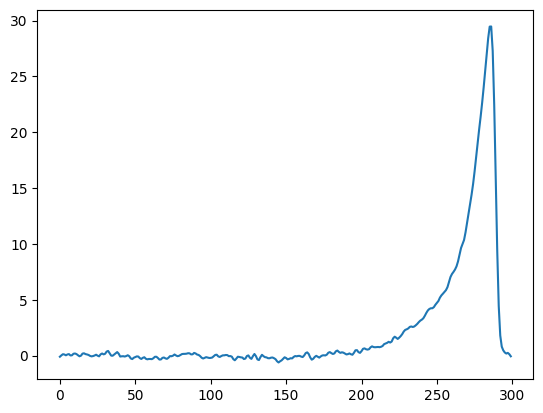

In [9]:
import matplotlib.pyplot as plt # DON'T CHANGE THIS LINE 
import matplotlib.image as mpimg # DON'T CHANGE THIS LINE 


sta = sta # Please delete "None" and insert here your spike triggered average answer 
plt.plot(range(sta.shape[0]), sta) # DON'T CHANGE THIS LINE 

<strong>If you did everything correct, your plot should look the same as the one below!</strong>

<img src="sta_sample.png" alt="no-picture" align="left"> <br><br><br><br><br><br><br><br><br><br><br><br><br>


<strong>Congratulations! You have just learned how the brain works! Kudos to you! :)</strong>

<br><br>
### Question 2 (7,0 values)  Aircraft Wildlife Strikes

![](https://i.pinimg.com/400x/30/de/ee/30deee2cbc1aec96a1532c4a27962f0c--bird-strike-passenger-aircraft.jpg)

The "wildlifestrikes.csv" dataset contains a record of each reported wildlife strike of military, commercial, or civil aircraft between 1990 and 2015. Each row contains the incident date, aircraft operator, aircraft make and model, engine make and model, airport name and location, species name and quantity, and aircraft damage.
The wildlife strike database was compiled from reports received from airports, airlines, and pilots and published by the Federal Aviation Association. 
<br>

**Question 2.1** 

Import the dataset "wildlifestrikes.csv" and show the ***total number of records***, the ***number of columns***, and how many ***unique species*** the dataset has.


In [10]:
import pandas as pd
import numpy as np

In [11]:
# Question 2.1
df = pd.read_csv("wildlifestrikes.csv", low_memory=False)

nrecords = len(df)

ncolumns = len(df.columns)

uspecies = df["Species Name"].nunique()

print(f"total number of records {nrecords} / number of columns {ncolumns} / unique species {uspecies}")

total number of records 174104 / number of columns 66 / unique species 715


**Question 2.2** 

In 2000, what percentage of flights suffered a wild animal strike and had to perform a "PRECAUTIONARY LANDing"? (hint: check the "Flight Impact" column in the dataset). Report the result to two decimal places.

In [12]:
# Question 2.2

df2000 = df[df['Incident Year'] == 2000]

ftotal = len(df2000)

lprecautionary = df2000[df2000['Flight Impact'].str.contains('PRECAUTIONARY LANDING', na=False)]
lprecautionary_count = len(lprecautionary)

percentage = round((lprecautionary_count / ftotal) * 100, 2)

print(f"Percentage {percentage}%")

Percentage 5.15%


**Question 2.3** 

What was the year with the highest fatalities due to a wildlife strike? (hint: check the column "Fatalities" on the dataset)

In [13]:
# Question 2.3
year = df.groupby('Incident Year')['Fatalities'].sum()
print(year.idxmax())

2009


**Question 2.4** 

Find the top 5 species that caused engine damage on the aircraft after striking it (remember that there are up to 4 different possible engines on an aircraft). For this exercise, you can consider unknown species.

In [14]:
# Question 2.4
# Create engine damage mask
engine = (df['Engine1 Damage'] == 1) | (df['Engine2 Damage'] == 1) |  (df['Engine3 Damage'] == 1) | (df['Engine4 Damage'] == 1)

# Get top 5 species
top = df[engine]['Species Name'].value_counts().head()

print(top)



Species Name
UNKNOWN MEDIUM BIRD    1593
GULL                    380
UNKNOWN SMALL BIRD      261
UNKNOWN LARGE BIRD      219
CANADA GOOSE            201
Name: count, dtype: int64


**Question 2.5** 

Find the name of the specie that was responsible for the most incidents and indicate the total number of incidents caused by it. The result cannot be an unknown bird.

In [15]:
# Question 2.5
counts = df.groupby('Species Name').size()
counts = counts[[species for species in counts.index if 'UNKNOWN' not in species.upper()]]

top_species = counts.idxmax()
incidents = counts.max()

print(f"{top_species} {incidents}")


MOURNING DOVE 7653


**Question 2.6**  Show how many incidents occurred every five years (i.e. total number of incidents for each of the following time intervals: (1990, 1995], (1995, 2000], (2000, 2005], (2005, 2010], and (2010,2015]). Note that the time intervals are open on the left and closed on the right.

In [16]:
# Question 2.6
bins = [1990, 1995, 2000, 2005, 2010, 2015]
df['Year Group'] = pd.cut(df['Incident Year'], bins=bins, right=True, include_lowest=False)
incidents = df['Year Group'].value_counts().sort_index()

print(incidents)

Year Group
(1990, 1995]    14264
(1995, 2000]    22733
(2000, 2005]    34073
(2005, 2010]    43518
(2010, 2015]    57417
Name: count, dtype: int64


**Question 2.7** 

Consider the five-time intervals: (1990, 1995], (1995, 2000], (2000, 2005], (2005, 2010], and (2010,2015]. Use a pivot_table to find out, ***on each time interval***, which type of aircraft ("Aircraft") got most frequently damaged ("Aircraft Damage") after a wildlife strike. (hint: First, do the pivot table with the total sum of the damage per each type of aircraft suffered at each time interval. After that, obtain the aircraft type with the highest value for each time interval.)

In [17]:
# Question 2.7
pivot_table = pd.pivot_table(df, values='Aircraft Damage', 
                             index='Year Group', columns='Aircraft', 
                             aggfunc='sum', fill_value=0, observed=False)

# Find the aircraft with the highest damage in each time interval
aircraftHV = pivot_table.idxmax(axis=1)
print(aircraftHV)


Year Group
(1990, 1995]    B-737-300
(1995, 2000]    B-737-300
(2000, 2005]    B-737-300
(2005, 2010]        A-320
(2010, 2015]        A-320
dtype: object



### Question 3 (8 values)- A Million Dollar Question: Squid Game or Alice in Borderland?


“What TV sereis should I binge-watch this evening?” This perhaps is a question you would ask yourself very often. As for me — yes, and more than once. As such, from Netflix to Hulu, the need to build robust movie recommendation systems is extremely important given the huge demand for personalized content of modern consumers. **Netflix is forecasting it will add 3.5 million paying subscribers thanks to the surprise hit Squid Games**

We are going to examine a MovieLens dataset which provides non-commercial, personalized movie recommendations. 

This dataset describes user ratings from MovieLens. It contains ratings and tag applications across movies created by  users. Users were selected at random for inclusion. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files movies_fe.xlsx, ratings_fe.csv. More details about the contents and use of all these files follows.

**Ratings Data File Structure (ratings_fe.csv)**
All ratings are contained in the file ratings_fe.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
`userId,movieId,rating,timestamp`

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

**Movies Data File Structure (movies_fe.xlsx)**
Movie information is contained in the file movies_fe.xlsx. Each line of this file after the header row represents one movie, and has the following format:
`movieId,title,year,genres`

Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers

In [18]:
import pandas as pd
import numpy as np

#### Question 3.1

However, there may be errors and inconsistencies in these files, as shown below:

The ratings in the `rating_fe.csv` should be made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars). So if the ratings are larger than 5 or smaller than 0.5, you need to round it to the value of 5 and 1, respectively. For example, if a movie is rated 8, then it might be wrongly rated and you need to change the value to 5. Similarly, if a movie is rated negatively, e.g., -1, then it should be changed to 1, if any.

The movie information in the `movies_fe.xlsx` contains the movies with the missing information about **year**. You should also remove them.

You should also inspect the data to make sure the correct starting row of the data.

In [19]:
# Question 3.1

df_ratings = pd.read_csv('ratings_fe.csv', encoding='ISO-8859-1', skiprows=10)
df_movies = pd.read_excel('movies_fe.xlsx', skiprows=15)

#print(df_ratings.head())
#print(df_movies.head())

df_ratings['rating'] = np.clip(df_ratings['rating'], 0.5, 5)
df_ratings['rating'] = np.round(df_ratings['rating'] * 2) / 2
   
movies = df_movies.dropna(subset=['year'])


#### Question 3.2 

Show the top 5 Action movies with the highest median ratings:

In [20]:
# Question 3.2
action_mv = df_movies[df_movies['genres'].str.contains('Action', case=False, na=False)]

merged_df = action_mv.merge(df_ratings, on='movieId')

median_rt = merged_df.groupby('title')['rating'].median().reset_index()

top5 = median_rt.sort_values(by='rating', ascending=False).head()

print(top5)


                                                 title  rating
459                     Farscape: The Peacekeeper Wars     5.0
428                                   Enemy Below, The     5.0
21   36th Chamber of Shaolin, The (Shao Lin san shi...     5.0
343                           Dead or Alive: Hanzaisha     5.0
360                                          Def-Con 4     5.0


#### Question 3.3 

Among all movies that user with Id 500 has rated, show the his/her top 5 favorite movies in each of the following three genres **Adventure**, **Comedy**, **Drama** (i.e., the movie he/she rated 5) more recently as three columns: `movieId, title, genre`. If you see the movies with overlapping genres, it is ok to include them several times.

In [21]:
# Question 3.3
id500_rt = df_ratings[df_ratings['userId'] == 500]

id500_mv = id500_rt.merge(df_movies, on='movieId')

id500_topmv = id500_mv[id500_mv['rating'] == 5]

result = pd.DataFrame()

for genre in ['Adventure', 'Comedy', 'Drama']:
    genre_movies = id500_topmv[id500_topmv['genres'].str.contains(genre, case=False)]
    
    genre_movies = genre_movies.sort_values(by='timestamp', ascending=False).head(5)

    result = pd.concat([result, genre_movies[['movieId', 'title', 'genres']]], ignore_index=True)

print(result)


    movieId                                              title  \
0      2162        NeverEnding Story II: The Next Chapter, The   
1      1136                    Monty Python and the Holy Grail   
2      5444                                      Lilo & Stitch   
3         1                                          Toy Story   
4      2115               Indiana Jones and the Temple of Doom   
5      1391                                      Mars Attacks!   
6       671            Mystery Science Theater 3000: The Movie   
7      3671                                    Blazing Saddles   
8      2788  Monty Python's And Now for Something Completel...   
9       235                                            Ed Wood   
10     2291                                Edward Scissorhands   
11      235                                            Ed Wood   
12     4754                                    Wicker Man, The   
13     4036                              Shadow of the Vampire   
14     194

#### Question 3.4 

Show the pivot table of mean and standard deviation for the ratings of movies across the row of released decades (for example, year 1995 belongs to 1990s decade), and the column of quartile of the timestamp values (in terms of 4 groups).

In [22]:
# Question 3.4
df_movies['decade'] = (df_movies['year'] // 10) * 10

quartiles = pd.qcut(df_ratings['timestamp'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_ratings['timestamp_quartile'] = quartiles

merged_df = df_ratings.merge(df_movies, on='movieId')

pivot_table = pd.pivot_table(
    merged_df, 
    values='rating', 
    index='decade', 
    columns='timestamp_quartile', 
    aggfunc=[np.mean, np.std],
    observed=False
)

print(pivot_table)

                        mean                                     std  \
timestamp_quartile        Q1        Q2        Q3        Q4        Q1   
decade                                                                 
1900.0                   NaN       NaN       NaN  4.500000       NaN   
1910.0                   NaN  2.666667  3.666667  0.500000       NaN   
1920.0              4.000000  3.869048  3.800000  3.852273  1.069045   
1930.0              3.940075  3.801923  3.839450  3.689024  0.959796   
1940.0              3.997375  3.950119  3.910290  3.706977  0.919092   
1950.0              3.840336  3.815723  3.871893  3.639759  0.949776   
1960.0              3.823678  3.788955  3.794673  3.655833  0.996093   
1970.0              3.759878  3.724583  3.666779  3.718609  1.090443   
1980.0              3.512641  3.527864  3.502818  3.534598  1.100325   
1990.0              3.452022  3.395828  3.331277  3.431370  1.080266   
2000.0              3.500000  3.345169  3.464876  3.478017  1.60

/var/folders/jy/vfzb27150nd0q7kfmfb32dcw0000gn/T/ipykernel_31050/3294899954.py:9: FutureWarning: The provided callable <function mean at 0x109860360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(
/var/folders/jy/vfzb27150nd0q7kfmfb32dcw0000gn/T/ipykernel_31050/3294899954.py:9: FutureWarning: The provided callable <function std at 0x1098604a0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_table = pd.pivot_table(


#### Question 3.5 

Now you need to implement a **recommender system using collaborative filtering method**. This works simply as to recommend movies that "people who like this movie also like these movies". For example, people who like to watch Star Wars are very likely to watch Star Treks. 

In order to do so, you need to find all users who like one movie (i.e., post a rating of 5), and identify the movies these users also like, ranked by the number of likes. 

Show the recommended movie list with top 10 movies that users who like the *Titanic* may also like.

In [23]:
# Question 3.5
titanic_id = df_movies[df_movies['title'] == 'Titanic']['movieId'].values[0]
liked_titanic = df_ratings[df_ratings['movieId'] == titanic_id]
liked_titanic = liked_titanic[liked_titanic['rating'] == 5]['userId']

ot_mv = df_ratings[df_ratings['userId'].isin(liked_titanic)]

recommend_mv = ot_mv[ot_mv['rating'] == 5]['movieId'].value_counts()

recommend_mv = recommend_mv[recommend_mv.index != titanic_id]

top_recommend_mv = recommend_mv.head(10)

top_recommend_mv_df = df_movies[df_movies['movieId'].isin(top_recommend_mv.index)]
top_recommend_mv_df['Likes'] = top_recommend_mv.values

print(top_recommend_mv_df[['movieId', 'title', 'Likes']])


      movieId                       title  Likes
101       110                  Braveheart      8
293       318   Shawshank Redemption, The      8
330       356                Forrest Gump      8
484       527            Schindler's List      8
534       589  Terminator 2: Judgment Day      8
537       593   Silence of the Lambs, The      7
1397     1784          As Good as It Gets      7
1576     2028         Saving Private Ryan      7
2033     2571                 Matrix, The      7
2363     2959                  Fight Club      6


/var/folders/jy/vfzb27150nd0q7kfmfb32dcw0000gn/T/ipykernel_31050/847065675.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommend_mv_df['Likes'] = top_recommend_mv.values


Congratulations! You just build the first [recommender system that worth 1 million dollars](https://www.netflixprize.com/) :D

![netflix_prize](https://cdn.vox-cdn.com/thumbor/Kp9TEknNzIQV-ZijAm74cfHx_D0=/0x124:1100x700/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/15788062/netflix-prize1.0.1537040369.jpg)

Before submission, do not forget to restart the kernel and run the whole notebook. 

Thank you!!